In [1]:
import math
import pandas_datareader as web
import numpy as np
import pandas as pd
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import mean_absolute_error
from keras.models import Sequential
from keras.layers import Dense, LSTM
import matplotlib.pyplot as plt
plt.style.use('fivethirtyeight')
%matplotlib inline

In [9]:
df1 = pd.read_excel('../Datasets/SBIN-MinData.xlsx')

In [10]:
df2 = df1
df2.head(3)

,Date,Min,Close
0,2021-07-01,09:15:00,289.95
1,2021-07-01,09:16:00,289.75
2,2021-07-01,09:17:00,289.40


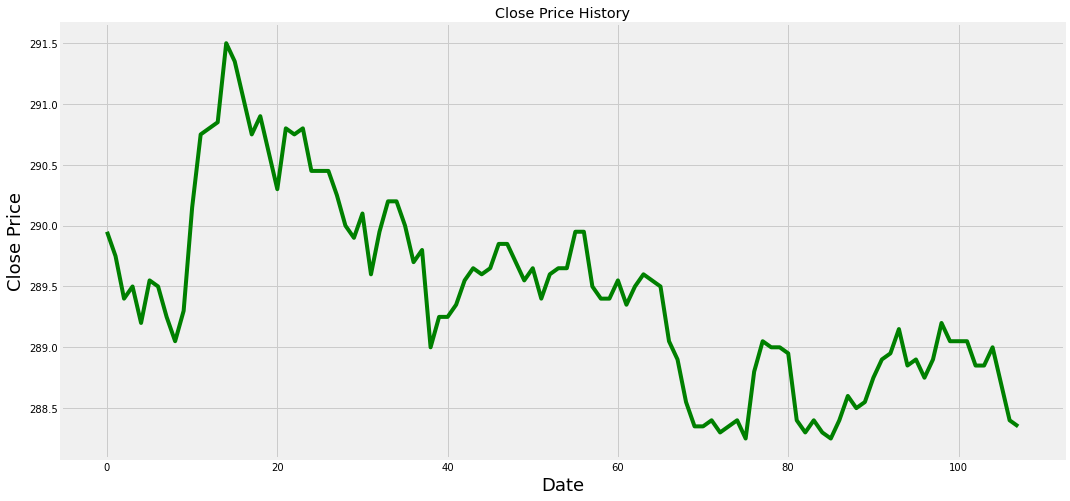

In [11]:
plt.figure(figsize=(16,8))
plt.title('Close Price History')
plt.plot(df2['Close'],color='green')
plt.xlabel('Date',fontsize=18)
plt.ylabel('Close Price',fontsize=18)
plt.show()

In [12]:
df2["returns"] = df2.Close.pct_change()

In [13]:
df2["log_returns"] = np.log(1 + df2["returns"])

In [14]:
df2.head(4)

,Date,Min,Close,returns,log_returns
0,2021-07-01,09:15:00,289.95,NaN,NaN
1,2021-07-01,09:16:00,289.75,-0.000690,-0.000690
2,2021-07-01,09:17:00,289.40,-0.001208,-0.001209
3,2021-07-01,09:18:00,289.50,0.000346,0.000345


In [15]:
df2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 108 entries, 0 to 107
Data columns (total 5 columns):
 #   Column       Non-Null Count  Dtype         
---  ------       --------------  -----         
 0   Date         108 non-null    datetime64[ns]
 1   Min          108 non-null    object        
 2   Close        108 non-null    float64       
 3   returns      107 non-null    float64       
 4   log_returns  107 non-null    float64       
dtypes: datetime64[ns](1), float64(3), object(1)
memory usage: 4.3+ KB


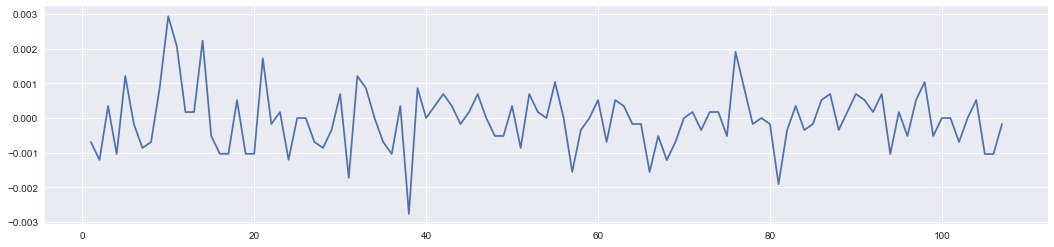

In [16]:
plt.style.use(style="seaborn")
plt.figure(1, figsize=(16, 4))
plt.plot(df2.log_returns)

In [18]:
df2.dropna(inplace=True)
X = df2[["Close","log_returns"]].values

In [19]:
X[:5]

array([[ 2.89750000e+02, -6.90012103e-04],
       [ 2.89400000e+02, -1.20866802e-03],
       [ 2.89500000e+02,  3.45482816e-04],
       [ 2.89200000e+02, -1.03680673e-03],
       [ 2.89550000e+02,  1.20950339e-03]])

In [20]:
scaler = MinMaxScaler(feature_range=(0,1)).fit(X)
X_scaled = scaler.transform(X)

In [21]:
X_scaled[:5]

array([[0.46153846, 0.36403497],
       [0.35384615, 0.27301333],
       [0.38461538, 0.5457594 ],
       [0.29230769, 0.30317417],
       [0.4       , 0.69739089]])

In [22]:
y = [x[0] for x in X_scaled]


In [23]:
y[:5]

[0.461538461538467,
 0.35384615384614904,
 0.3846153846153868,
 0.2923076923076877,
 0.4000000000000057]

In [24]:
split = int(len(X_scaled) * 0.81)
print(split)

86


In [25]:
X_train = X_scaled[:split]
X_test = X_scaled[split:len(X_scaled)]
y_train = y[:split]
y_test = y[split:len(y)]



In [26]:
assert len(X_train) == len(y_train)
assert len(X_test) == len(y_test)

In [27]:
n = 1
Xtrain = []
ytrain = []
Xtest = []
ytest = []
for i in range(n, len(X_train)):
    Xtrain.append(X_train[i - n : i, : X_train.shape[1]])
    ytrain.append(y_train[i])  # predict next record
for i in range(n, len(X_test)):
    Xtest.append(X_test[i - n : i, : X_test.shape[1]])
    ytest.append(y_test[i])  # predict next record

In [28]:
Xtrain[0]

array([[0.46153846, 0.36403497]])

In [29]:
ytrain[0]

0.35384615384614904

In [30]:
val = np.array(ytrain[0])
val = np.c_[val, np.zeros(val.shape)]

In [31]:
Xtrain, ytrain = (np.array(Xtrain), np.array(ytrain))
Xtrain = np.reshape(Xtrain, (Xtrain.shape[0], Xtrain.shape[1], Xtrain.shape[2]))

Xtest, ytest = (np.array(Xtest), np.array(ytest))
Xtest = np.reshape(Xtest, (Xtest.shape[0], Xtest.shape[1], Xtest.shape[2]))

In [32]:
print(Xtrain.shape)
print(ytrain.shape)
print("---")
print(Xtest.shape)
print(ytest.shape)

(85, 1, 2)
(85,)
---
(20, 1, 2)
(20,)


In [45]:
model = Sequential()
model.add(LSTM(50, input_shape=(Xtrain.shape[1], Xtrain.shape[2])))
model.add(Dense(1))
model.compile(loss="mean_squared_error", optimizer="adam")
model.fit(
    Xtrain, ytrain, epochs=100, validation_data=(Xtest, ytest), batch_size=64, verbose=1
)

Epoch 1/100
2/2 [==============================] - 1s 633ms/step - loss: 0.2274 - val_loss: 0.0340
Epoch 2/100
2/2 [==============================] - 0s 16ms/step - loss: 0.2174 - val_loss: 0.0307
Epoch 3/100
2/2 [==============================] - 0s 16ms/step - loss: 0.2082 - val_loss: 0.0276
Epoch 4/100
2/2 [==============================] - 0s 17ms/step - loss: 0.1987 - val_loss: 0.0248
Epoch 5/100
2/2 [==============================] - 0s 14ms/step - loss: 0.1898 - val_loss: 0.0221
Epoch 6/100
2/2 [==============================] - 0s 15ms/step - loss: 0.1810 - val_loss: 0.0196
Epoch 7/100
2/2 [==============================] - 0s 17ms/step - loss: 0.1725 - val_loss: 0.0172
Epoch 8/100
2/2 [==============================] - 0s 16ms/step - loss: 0.1646 - val_loss: 0.0151
Epoch 9/100
2/2 [==============================] - 0s 17ms/step - loss: 0.1565 - val_loss: 0.0131
Epoch 10/100
2/2 [==============================] - 0s 17ms/step - loss: 0.1488 - val_loss: 0.0114
Epoch 11/100
2/2 [

Epoch 84/100
2/2 [==============================] - 0s 18ms/step - loss: 0.0230 - val_loss: 0.0278
Epoch 85/100
2/2 [==============================] - 0s 15ms/step - loss: 0.0227 - val_loss: 0.0274
Epoch 86/100
2/2 [==============================] - 0s 14ms/step - loss: 0.0225 - val_loss: 0.0272
Epoch 87/100
2/2 [==============================] - 0s 14ms/step - loss: 0.0223 - val_loss: 0.0271
Epoch 88/100
2/2 [==============================] - 0s 16ms/step - loss: 0.0220 - val_loss: 0.0269
Epoch 89/100
2/2 [==============================] - 0s 14ms/step - loss: 0.0218 - val_loss: 0.0265
Epoch 90/100
2/2 [==============================] - 0s 16ms/step - loss: 0.0216 - val_loss: 0.0262
Epoch 91/100
2/2 [==============================] - 0s 17ms/step - loss: 0.0213 - val_loss: 0.0258
Epoch 92/100
2/2 [==============================] - 0s 19ms/step - loss: 0.0211 - val_loss: 0.0254
Epoch 93/100
2/2 [==============================] - 0s 15ms/step - loss: 0.0209 - val_loss: 0.0251
Epoch 94/1

In [46]:
model.summary()

Model: "sequential_4"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
lstm_4 (LSTM)                (None, 50)                10600     
_________________________________________________________________
dense_3 (Dense)              (None, 1)                 51        
Total params: 10,651
Trainable params: 10,651
Non-trainable params: 0
_________________________________________________________________


In [47]:
Xtrain.shape


(85, 1, 2)

In [48]:
trainPredict = model.predict(Xtrain)
testPredict = model.predict(Xtest)

In [49]:
trainPredict = np.c_[trainPredict, np.zeros(trainPredict.shape)]
testPredict = np.c_[testPredict, np.zeros(testPredict.shape)]

In [50]:
# invert predictions
trainPredict = scaler.inverse_transform(trainPredict)
trainPredict = [x[0] for x in trainPredict]

testPredict = scaler.inverse_transform(testPredict)
testPredict = [x[0] for x in testPredict]


In [51]:
print(trainPredict[:5])
print(testPredict[:5])

[289.63958482444286, 289.4237440750003, 289.62701378017664, 289.34946915507317, 289.7386577948928]
[289.24348636716604, 289.1023026406765, 289.17255913466215, 289.31158012896776, 289.36370489001274]


In [54]:
# calculate root mean squared error
from sklearn import metrics
trainScore = metrics.mean_squared_error([x[0][0] for x in Xtrain], trainPredict, squared=False)
print("Train Score: %.2f RMSE" % (trainScore))

testScore = metrics.mean_squared_error([x[0][0] for x in Xtest], testPredict, squared=False)
print("Test Score: %.2f RMSE" % (testScore))

Train Score: 289.23 RMSE
Test Score: 289.11 RMSE
